**About Dataset**
This dataset provides a comprehensive overview of online sales transactions across different product categories. Each row represents a single transaction with detailed information such as the order ID, date, category, product name, quantity sold, unit price, total price, region, and payment method.

**Columns:**
* Order ID: Unique identifier for each sales order.
* Date: Date of the sales transaction.
* Category: Broad category of the product sold (e.g., Electronics, Home Appliances, Clothing, Books, Beauty Products, Sports).
* Product Name: Specific name or model of the product sold.
* Quantity: Number of units of the product sold in the transaction.
* Unit Price: Price of one unit of the product.
* Total Price: Total revenue generated from the sales transaction (Quantity * Unit Price).
* Region: Geographic region where the transaction occurred (e.g., North America, Europe, Asia).
* Payment Method: Method used for payment (e.g., Credit Card, PayPal, Debit Card).

**Insights:**
1. Analyze sales trends over time to identify seasonal patterns or growth opportunities.
2. Explore the popularity of different product categories across regions.
3. Investigate the impact of payment methods on sales volume or revenue.
4. Identify top-selling products within each category to optimize inventory and marketing strategies.
5. Evaluate the performance of specific products or categories in different regions to tailor marketing campaigns accordingly.

[Dataset](https://www.kaggle.com/datasets/shivam2503/online-retail-analysis
)

Solution:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from colorama import Fore, Style

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Online Sales Data.csv'
data = pd.read_csv(path)

**Exploratory Data Analysis (EDA)**

In [ ]:
#This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [ ]:
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    240 non-null    int64         
 1   Date              240 non-null    datetime64[ns]
 2   Product Category  240 non-null    object        
 3   Product Name      240 non-null    object        
 4   Units Sold        240 non-null    int64         
 5   Unit Price        240 non-null    float64       
 6   Total Revenue     240 non-null    float64       
 7   Region            240 non-null    object        
 8   Payment Method    240 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 17.0+ KB


In [ ]:
#The function dataframe. isnull(). sum() returns the number of missing values in the dataset.
data.isnull().sum()

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

In [ ]:
#Check for duplicate values
data.duplicated()
#data.duplicated().sum()
#data.duplicated().any()

0      False
1      False
2      False
3      False
4      False
       ...  
235    False
236    False
237    False
238    False
239    False
Length: 240, dtype: bool

In [ ]:
# visualisation for duplicate values. Modul colorama is required
#if data.duplicated().any():
#           print(f'\n{Style.BRIGHT + Fore.LIGHTBLUE_EX}Duplicates exist in the dataset.{Style.RESET_ALL}')
#        else:
#            print(f'\n{Style.BRIGHT + Fore.LIGHTBLUE_EX}No duplicates found in the dataset.{Style.RESET_ALL}')
#    except Exception as e:
#        print_error(e)

*According to the data info, the data set has no missing or duplicated data.*




In [ ]:
# Checking validity of values: Total Revenue = Unit Sold * Unit Price

data['diff'] = data['Total Revenue'] - data['Unit Price'] * data['Units Sold']
data['diff'].sum()
data['diff'].describe()


count    2.400000e+02
mean     1.243450e-15
std      1.174171e-14
min     -2.842171e-14
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.136868e-13
Name: diff, dtype: float64

In [ ]:
# first 5 records
data.head(5)

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,diff
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,0.000000e+00
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,0.000000e+00
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,2.842171e-14
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,0.000000e+00
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,0.000000e+00


In [ ]:
#the summary of the central tendencies, dispersion, and shape of a dataset's distribution
data.describe(include = "all")

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,diff
count,240.00000,240,240,240,240.000000,240.000000,240.000000,240,240,2.400000e+02
unique,NaN,NaN,6,232,NaN,NaN,NaN,3,3,NaN
top,NaN,NaN,Electronics,Dyson Supersonic Hair Dryer,NaN,NaN,NaN,North America,Credit Card,NaN
freq,NaN,NaN,40,2,NaN,NaN,NaN,80,120,NaN
mean,10120.50000,2024-04-29 12:00:00,NaN,NaN,2.158333,236.395583,335.699375,NaN,NaN,1.243450e-15
min,10001.00000,2024-01-01 00:00:00,NaN,NaN,1.000000,6.500000,6.500000,NaN,NaN,-2.842171e-14
25%,10060.75000,2024-02-29 18:00:00,NaN,NaN,1.000000,29.500000,62.965000,NaN,NaN,0.000000e+00
50%,10120.50000,2024-04-29 12:00:00,NaN,NaN,2.000000,89.990000,179.970000,NaN,NaN,0.000000e+00
75%,10180.25000,2024-06-28 06:00:00,NaN,NaN,3.000000,249.990000,399.225000,NaN,NaN,0.000000e+00
max,10240.00000,2024-08-27 00:00:00,NaN,NaN,10.000000,3899.990000,3899.990000,NaN,NaN,1.136868e-13


NOTE:
* count  - the number of completed rows in each column.
* unique - unique value
* top - the most common value
* freq - the most common value’s frequency
* mean - average value
* std - standard deviation. An important statistical indicator showing the spread of values.
* min - minimum values
* 25%/50%/75% - a percentile is a number that shows the distribution of values ​​in a sample. For example, case with Unit Price: 25% shows that 25% of all Unit Price values ​​are less than 29,5. The 50 percentile is the same as the median.
* max - maximum values.

*According to table, the first conclusion is:
Dyson Supersonic Hair Dryer	was sold twice, other goods - only once.
the goods from category Electronics were sold 40 times
the most goods were paid 120 times by Credit Cards
the large part of revenue were come from North America.

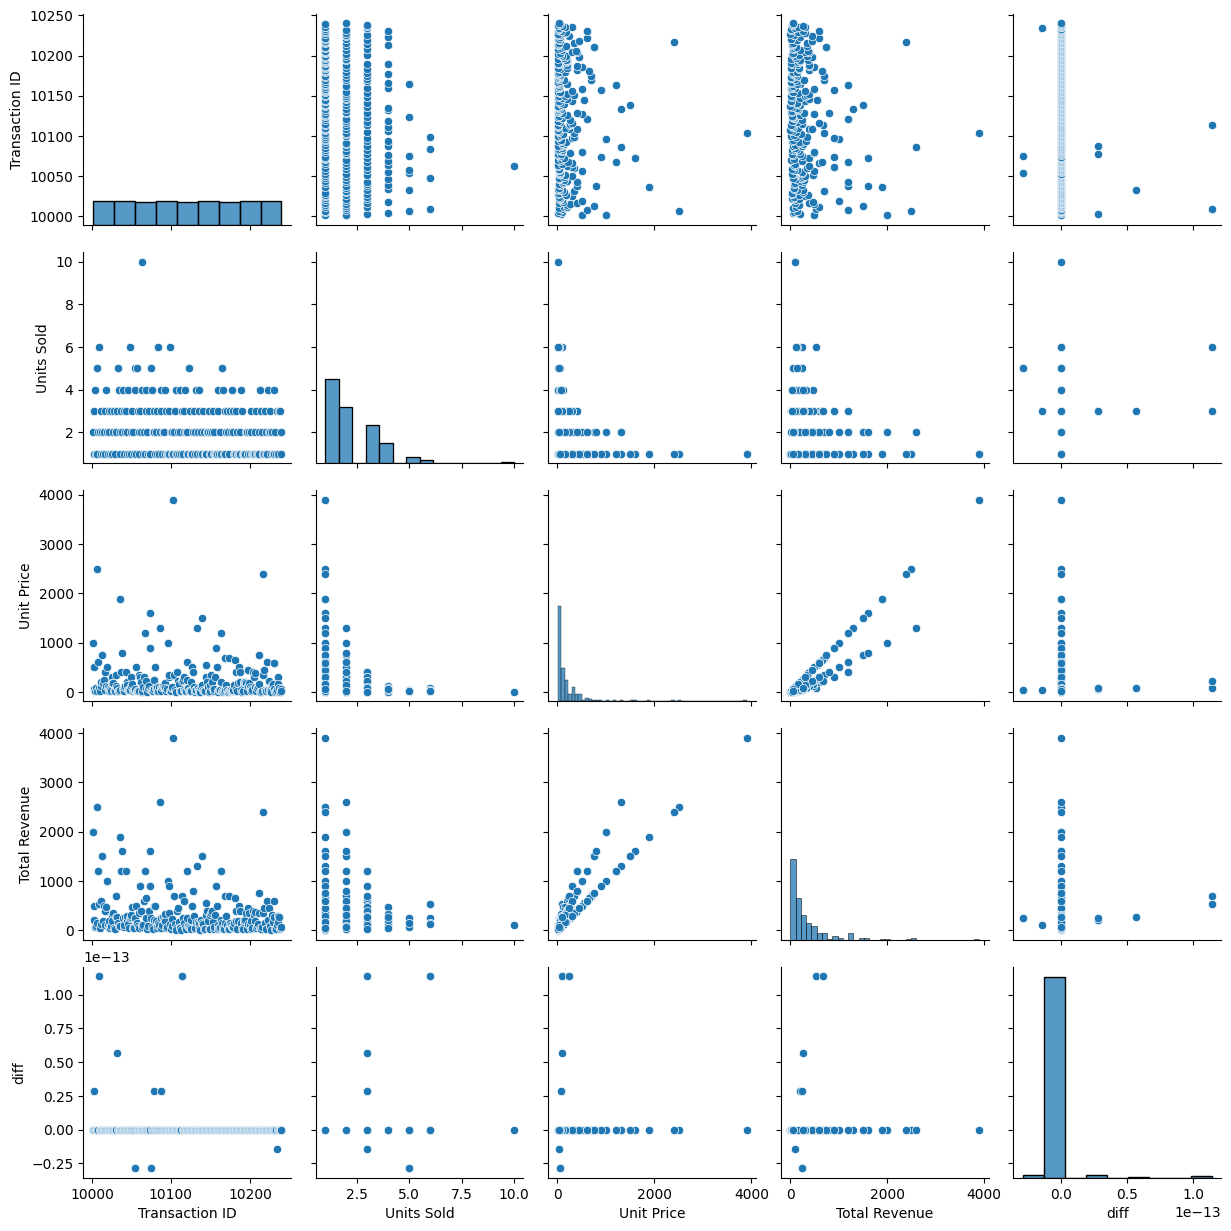

In [ ]:
#Create a matrix of scatter plots (and optionally, histograms or KDEs on the diagonal) for each pair of variables in the dataset.
g = sns.pairplot(data)


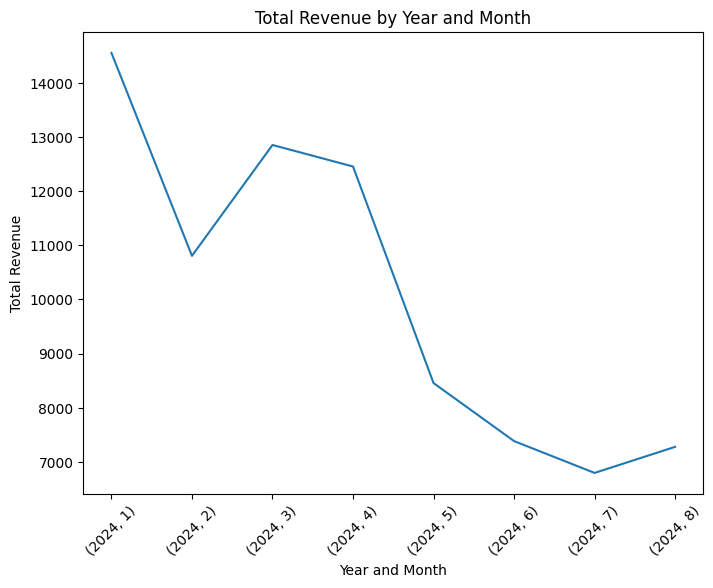

In [ ]:
# 1.Analyze sales trends over time to identify seasonal patterns or growth opportunities

# Group the data by year and month, and calculate the sum of total revenue
grouped_data = data.groupby([data['Date'].dt.year, data['Date'].dt.month])['Total Revenue'].sum()

# Plot the grouped data as a line chart
grouped_data.plot(kind='line', figsize=(8, 6))
plt.title('Total Revenue by Year and Month')
plt.xlabel('Year and Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

# Summary: Months where there was an increase in sales: January, March, April 2024. Months where there was a decline in sales: February, May, June 2024.
#          The external factors such as holidays, promotions, or economic conditions that may have influenced sales.
#          There is not enough information for a comprehensive analysis.


Region             Asia  Europe  North America
Product Category                              
Beauty Products     NaN    46.0            NaN
Books               NaN     NaN          114.0
Clothing          145.0     NaN            NaN
Electronics         NaN     NaN           66.0
Home Appliances     NaN    59.0            NaN
Sports             88.0     NaN            NaN


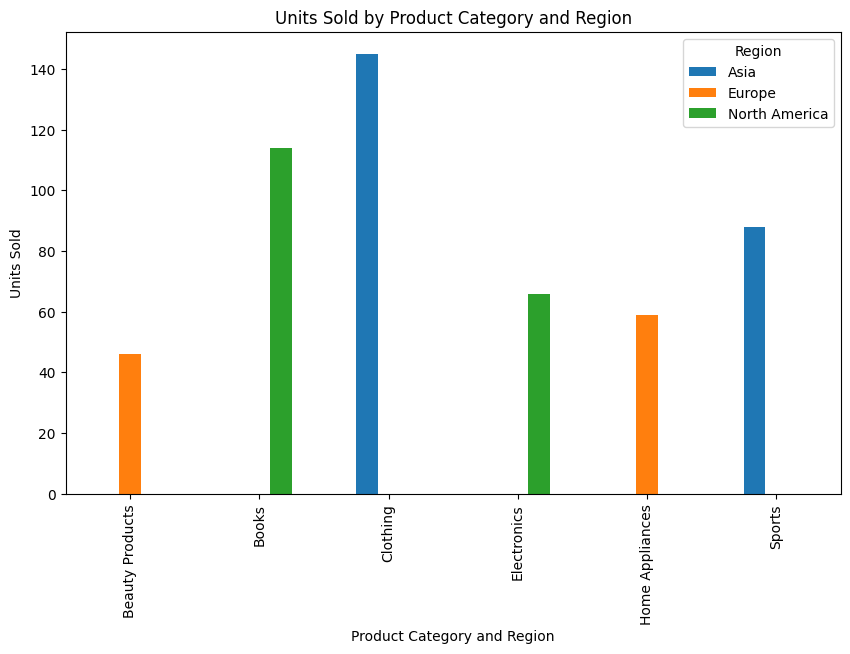

In [ ]:
#2.Explore the popularity of different product categories across regions.

# Group the data by product category and region, and calculate the sum of quantity sold
grouped_data = data.groupby(['Product Category', 'Region'])['Units Sold'].sum().unstack()

# Print the grouped data
print(grouped_data)

# Create a bar chart
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Units Sold by Product Category and Region')
plt.xlabel('Product Category and Region')
plt.ylabel('Units Sold')
plt.show()


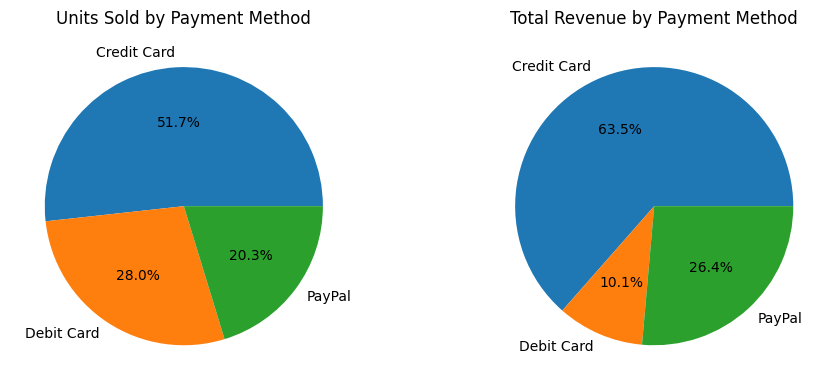

In [ ]:
#3.Investigate the impact of payment methods on sales volume,  revenue. Create pie charts to visualize the results.

# Group the data by payment method and calculate sum of quantity and total revenue
grouped_data = data.groupby('Payment Method')[['Units Sold', 'Total Revenue']].sum()

# Create two pie charts, one for quantity and one for revenue
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Pie chart for quantity
axs[0].pie(grouped_data['Units Sold'], labels=grouped_data.index, autopct='%1.1f%%')
axs[0].set_title('Units Sold by Payment Method')

# Pie chart for revenue
axs[1].pie(grouped_data['Total Revenue'], labels=grouped_data.index, autopct='%1.1f%%')
axs[1].set_title('Total Revenue by Payment Method')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


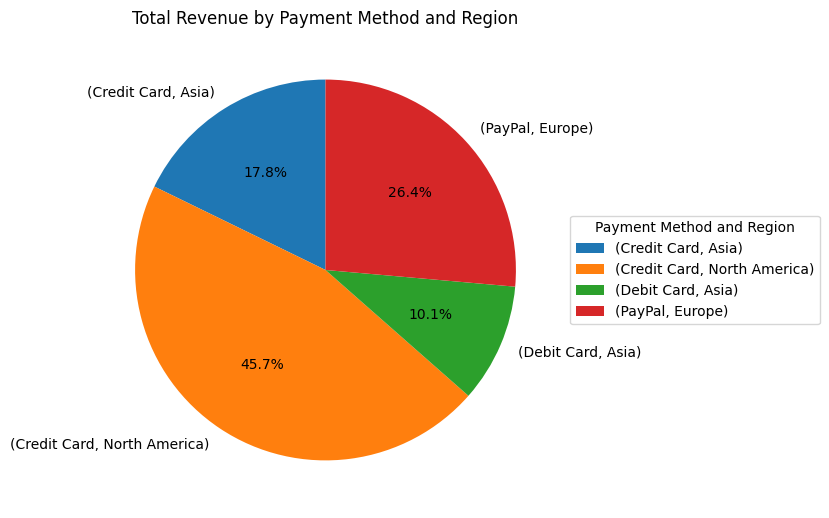

In [ ]:
# Group the data by payment method and region, then calculate sum of total revenue
grouped_data = data.groupby(['Payment Method', 'Region'])['Total Revenue'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
grouped_data.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Total Revenue by Payment Method and Region')
plt.ylabel('')  # Remove the default y-axis label
plt.legend(title='Payment Method and Region', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

Product Category  Beauty Products    Books  Clothing  Electronics  \
Payment Method                                                      
Credit Card                   NaN  1861.93       NaN     34982.41   
Debit Card                    NaN      NaN   8128.93          NaN   
PayPal                     2621.9      NaN       NaN          NaN   

Product Category  Home Appliances    Sports  
Payment Method                               
Credit Card                   NaN  14326.52  
Debit Card                    NaN       NaN  
PayPal                   18646.16       NaN  


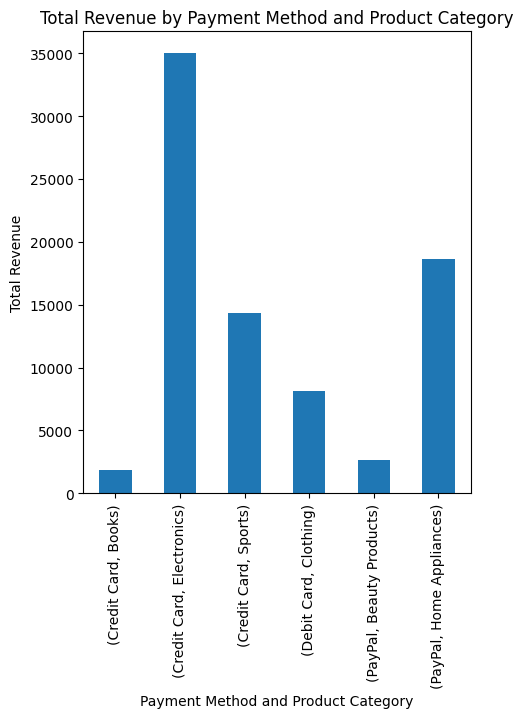

In [ ]:
# Investigate payment method and category.

# Group the data by payment method and category, then calculate sum of total revenue
grouped_data = data.groupby(['Payment Method', 'Product Category'])['Total Revenue'].sum().unstack()

# Print the grouped data
print(grouped_data)

# Group the data by payment method and category, then calculate sum of total revenue
grouped_data = data.groupby(['Payment Method', 'Product Category'])['Total Revenue'].sum()

# Create a bar chart
grouped_data.plot(kind='bar', figsize=(5, 6))
plt.title('Total Revenue by Payment Method and Product Category')
plt.xlabel('Payment Method and Product Category')
plt.ylabel('Total Revenue')
plt.show()


In [ ]:
# 4.Identify top-selling products within each category to optimize inventory and marketing strategies.

def top_selling_products(data):
  """
  This function identifies the top-selling products within each category.
  Args:
    data: A Pandas DataFrame containing the sales data.
  Returns:
    A dictionary where the keys are product categories and the values are lists of the top-selling products in that category.
  """
  top_selling = {}
  for category in data['Product Category'].unique():
    category_data = data[data['Product Category'] == category]
    top_selling[category] = category_data.sort_values(by='Units Sold', ascending=False)['Product Name'].head(5).tolist()
  return top_selling

top_selling = top_selling_products(data)

# Print the top-selling products for each category
for category, products in top_selling.items():
  print(f"Top-selling products in category '{category}':")
  for product in products:
    print(f"\t- {product}")


Top-selling products in category 'Electronics':
	- Amazon Echo Dot (4th Gen)
	- Anker PowerCore Portable Charger
	- Amazon Fire TV Stick 4K
	- Apple Watch Series 8
	- GoPro HERO10 Black
Top-selling products in category 'Home Appliances':
	- Instant Pot Duo
	- Eufy RoboVac 11S
	- Anova Precision Cooker
	- LG OLED TV
	- Cuisinart Coffee Center
Top-selling products in category 'Clothing':
	- Hanes ComfortSoft T-Shirt
	- Nike Air Force 1
	- Gap Essential Crewneck T-Shirt
	- Forever 21 Graphic Tee
	- Tommy Hilfiger Polo Shirt
Top-selling products in category 'Books':
	- The Da Vinci Code
	- Becoming by Michelle Obama
	- The Catcher in the Rye by J.D. Salinger
	- To Kill a Mockingbird by Harper Lee
	- Where the Crawdads Sing by Delia Owens
Top-selling products in category 'Beauty Products':
	- CeraVe Hydrating Facial Cleanser
	- L'Oreal Revitalift Serum
	- L'Occitane Shea Butter Hand Cream
	- Anastasia Beverly Hills Brow Wiz
	- First Aid Beauty Ultra Repair Cream
Top-selling products in cate

In [ ]:
# Checking is needed ("Is the item in the right category?")

data[data['Product Name'].str.contains('LG OLED TV')]


,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,diff
85,10086,2024-03-26,Home Appliances,LG OLED TV,2,1299.99,2599.98,Europe,PayPal,0.0


In [ ]:
# Identify top-selling products by regions without categories

def top_selling_products_by_region(data):
  """
  This function identifies the top-selling products by regions without categories.
  Args:
    data: A Pandas DataFrame containing the sales data.
  Returns:
    A dictionary where the keys are regions and the values are lists of the top-selling products in that region.
  """
  top_selling = {}
  for region in data['Region'].unique():
    region_data = data[data['Region'] == region]
    top_selling[region] = region_data.sort_values(by='Units Sold', ascending=False)['Product Name'].head(5).tolist()
  return top_selling

top_selling_by_region = top_selling_products_by_region(data)

# Print the top-selling products for each region
for region, products in top_selling_by_region.items():
  print(f"Top-selling products in region '{region}':")
  for product in products:
    print(f"\t- {product}")


Top-selling products in region 'North America':
	- Where the Crawdads Sing by Delia Owens
	- The Catcher in the Rye by J.D. Salinger
	- The Da Vinci Code
	- Atomic Habits by James Clear
	- Amazon Echo Dot (4th Gen)
Top-selling products in region 'Europe':
	- Eufy RoboVac 11S
	- Instant Pot Duo
	- Cuisinart Coffee Center
	- Keurig K-Elite Coffee Maker
	- LG OLED TV
Top-selling products in region 'Asia':
	- Hanes ComfortSoft T-Shirt
	- Yeti Rambler Tumbler
	- Nike Air Force 1
	- Gap Essential Crewneck T-Shirt
	- Spalding NBA Street Basketball


Region                Asia    Europe  North America
Product Category                                   
Beauty Products        NaN   2621.90            NaN
Books                  NaN       NaN        1861.93
Clothing           8128.93       NaN            NaN
Electronics            NaN       NaN       34982.41
Home Appliances        NaN  18646.16            NaN
Sports            14326.52       NaN            NaN


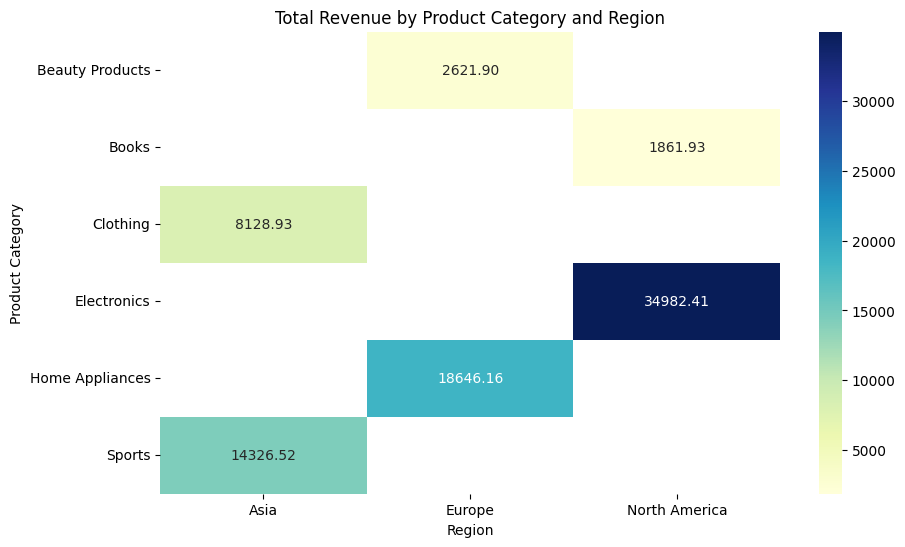

In [ ]:
# 5.Evaluate the performance of specific products or categories in different regions to tailor marketing campaigns accordingly.

# Group the data by product category and region, and calculate the sum of total revenue
grouped_data = data.groupby(['Product Category', 'Region'])['Total Revenue'].sum().unstack()

# Print the grouped data
print(grouped_data)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(grouped_data, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Total Revenue by Product Category and Region')
plt.xlabel('Region')
plt.ylabel('Product Category')
plt.show()

# Identify product categories with high revenue in specific regions
# - Look for cells in the heatmap with high values
# - Analyze trends across multiple regions to identify consistent patterns
# - Consider factors such as local preferences, demographics, and competition when tailoring marketing campaigns

# Identify specific products with high revenue in specific regions
# - Use the `top_selling_products` function to identify top-selling products in each region
# - Analyze sales trends for these products over time to identify growth opportunities
# - Consider factors such as product features, price, and availability when tailoring marketing campaigns



In [ ]:
# Prediction for future/ Linear Regression.
# Summary: Linear Regression can't be used as model due to value of Mean squared error (18125.06) is too high.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Prepare data
X = data[['Units Sold', 'Unit Price']]
y = data['Total Revenue']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print('Mean squared error:', mse)

# Use the model to predict future sales/Change values if it is needed
new_data = {'Units Sold': [100, 200], 'Unit Price': [50, 100]}
new_df = pd.DataFrame(new_data)
predicted_revenue = model.predict(new_df)
print('Predicted revenue:', predicted_revenue)

Mean squared error: 18125.060402436477
Predicted revenue: [4438.12598798 8894.73533246]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[2.42541436e+00 7.60584530e+01]
 [1.00000000e+00 2.93299333e+03]
 [1.40000000e+00 4.52766222e+02]
 [1.18181818e+00 1.25408182e+03]]


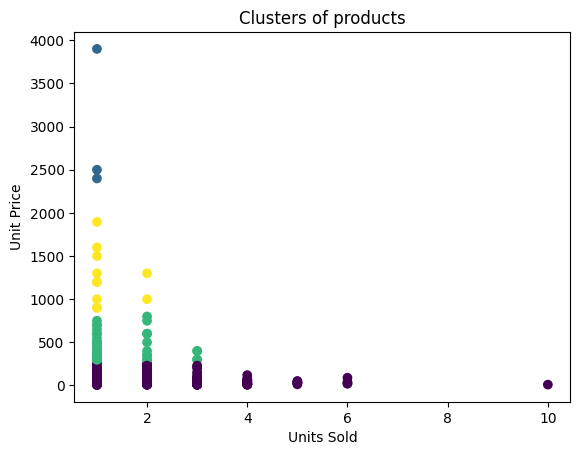

Cluster 0:
- Number of products: 181
- Average units sold: 2.43
- Average unit price: 76.06
- Top-selling products:
	- Hanes ComfortSoft T-Shirt
	- Gap Essential Crewneck T-Shirt
	- Yeti Rambler Tumbler
Cluster 1:
- Number of products: 3
- Average units sold: 1.00
- Average unit price: 2932.99
- Top-selling products:
	- MacBook Pro 16-inch
	- Canon EOS R5 Camera
	- Apple MacBook Pro 16-inch
Cluster 2:
- Number of products: 45
- Average units sold: 1.40
- Average unit price: 452.77
- Top-selling products:
	- GoPro HERO10 Black
	- Bose SoundLink Revolve+ Speaker
	- Nintendo Switch
Cluster 3:
- Number of products: 11
- Average units sold: 1.18
- Average unit price: 1254.08
- Top-selling products:
	- iPhone 14 Pro
	- LG OLED TV
	- Peloton Bike


In [ ]:
# Clustering Model
#Summary: The cluster model is convenient to use when the price spread is large (in this case, the price of some books is less than 1,
#         and the price of goods in the Electronics category is more than 500). Dividing into groups allows you to analyze which of the groups is the most profitable.
#         In this case, the least profitable are 181 products, and the most profitable are 59 products (clusters 1-3),
#         on which should be focused for increasing revenue.

from sklearn.cluster import KMeans

# Prepare the data
X = data[['Units Sold', 'Unit Price']]

# Choose the number of clusters
num_clusters = 4

# Create the KMeans model
model = KMeans(n_clusters=num_clusters)

# Fit the model
model.fit(X)

# Get the cluster labels
labels = model.labels_

# Add the cluster labels to the data
data['Cluster'] = labels

# Print the cluster centers
print(model.cluster_centers_)

# Visualize the clusters
plt.scatter(data['Units Sold'], data['Unit Price'], c=labels)
plt.xlabel('Units Sold')
plt.ylabel('Unit Price')
plt.title('Clusters of products')
plt.show()

# Analyze the clusters
for i in range(num_clusters):
  cluster_data = data[data['Cluster'] == i]
  print(f'Cluster {i}:')
  print(f'- Number of products: {len(cluster_data)}')
  print(f'- Average units sold: {cluster_data["Units Sold"].mean():.2f}')
  print(f'- Average unit price: {cluster_data["Unit Price"].mean():.2f}')
  print(f'- Top-selling products:')
  for product in cluster_data.sort_values(by='Units Sold', ascending=False)['Product Name'].head(3):
    print(f'\t- {product}')

